## LSTM
Long Short-Term Memory (LSTM) is a specialized type of Recurrent Neural Network (RNN) capable of learning long-term dependencies in sequence data.  
Key challenges standard RNNs face are vanishing and exploding gradients during backpropagation, which limits learning long sequences.  
LSTMs address this by using a memory cell and gating mechanisms (input, forget, output gates) to control information flow, enabling the network to maintain relevant information across time steps.

LSTM units:  
- **Cell state (memory)** that carries long-term information.  
- **Forget gate** to decide what information to discard.  
- **Input gate** to decide what new information to store.  
- **Output gate** to decide what to output.  

LSTMs are widely used in time series forecasting, language modeling, speech recognition, and many other sequential tasks.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Generate synthetic sine wave data for sequence regression
def create_sine_data(seq_length=50, total_samples=1000):
    X = []
    y = []
    x_vals = np.linspace(0, 100, total_samples + seq_length)
    sine_wave = np.sin(x_vals)

    for i in range(total_samples):
        X.append(sine_wave[i:i+seq_length])
        y.append(sine_wave[i+seq_length])

    X = np.array(X)
    y = np.array(y)
    # Reshape X for LSTM [samples, time_steps, features]
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X, y

# Prepare data
seq_length = 50
X, y = create_sine_data(seq_length)

print("Input shape:", X.shape)
print("Output shape:", y.shape)


Input shape: (1000, 50, 1)
Output shape: (1000,)


In [ ]:
# Build LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(seq_length,1)),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.4760 - val_loss: 0.1419
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0819 - val_loss: 0.0076
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0031 - val_loss: 9.0899e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 8.1895e-04 - val_loss: 4.7034e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3.7611e-04 - val_loss: 2.7658e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.3256e-04 - val_loss: 1.5001e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.2489e-04 - val_loss: 6.3778e-05
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.9615e-05 - val_loss: 2.5097e-05
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.9546e-05 - val_loss: 9.2213e-06
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.2536e-06 - val_loss: 4.8594e-06
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.2398e-06 - val_loss: 3.6680

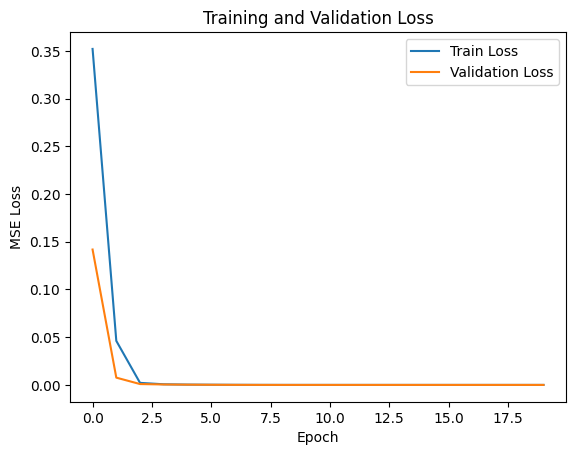

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


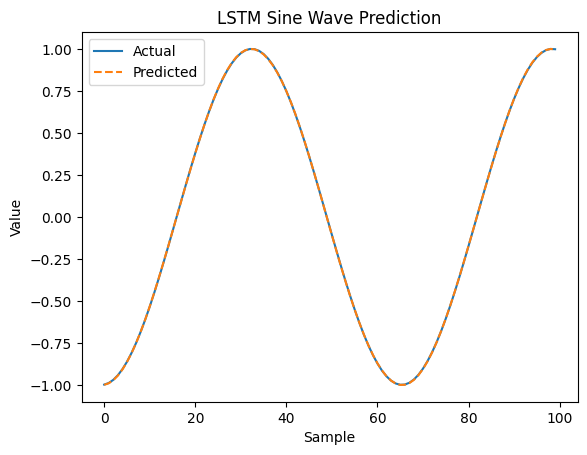

In [ ]:
# Make predictions
predictions = model.predict(X[:100])
plt.plot(y[:100], label='Actual')
plt.plot(predictions.flatten(), label='Predicted', linestyle='--')
plt.title('LSTM Sine Wave Prediction')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()

- #### Observations:

* Long Short-Term Memory (LSTM) is an advanced form of Recurrent Neural Network (RNN) designed to capture long-term dependencies in sequential data, effectively addressing the vanishing gradient problem.
* Synthetic sine wave data with a shape of (1000, 50, 1) was generated for sequence regression tasks.
* The LSTM model was built using an LSTM layer with 50 units followed by a Dense layer with 1 unit. The Adam optimizer was employed with a learning rate of 0.001.
* Both training and validation losses approached zero, indicating excellent learning and minimal room for further improvement.
* The model demonstrated strong performance on both training and unseen datasets.
* The predicted sine curve closely matched the actual waveform, showing that the LSTM successfully captured and learned the periodic nature of the sine function.